##       INVESTMENT ANALYSIS

### Part 1 – Indexes Analysis:

#### Choosing four major Market Indexes to determine which of them outperform best across multiple areas: volatility, returns, risk, and Sharpe ratios.

1.	S&P500 (GSPC). 
2.	NASDAQ Composite (IXIC). 
3.	S&P/ASX 200 (ASX). 
4.	DJCI (Dow Jones Commodity)
5.	CryptoCap(BTC-USD).


In [1]:
# Initial imports
import panel as pn
import requests
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
from MCForecastTools import MCSimulation
import json
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

### 1.	Prepare the Data: 

#### Collect Investments Data Using yfinance

In [3]:
# Get all data history of 5 years using yf funtion and "Close Price":

df = yf.download("^AXJO BTC-USD ^IXIC ^GSPC DJCI", start="2016-05-15", end="2021-05-23")
df_indexes = df['Close'].dropna()
df_indexes.head()

[*********************100%***********************]  5 of 5 completed


,BTC-USD,DJCI,^AXJO,^GSPC,^IXIC
Date,,,,,
2016-05-16,454.162994,15.4335,5358.899902,2066.659912,4775.459961
2016-05-17,453.782990,15.5900,5395.899902,2047.209961,4715.729980
2016-05-18,454.618988,15.4500,5356.200195,2047.630005,4739.120117
2016-05-19,438.714996,15.3678,5323.299805,2040.040039,4712.529785
2016-05-20,442.675995,15.3991,5351.299805,2052.320068,4769.560059


### Quantitative Analysis:

In [4]:
# Calculate Daily Returns
indexes_daily_return = df_indexes.pct_change()
indexes_daily_return.dropna(inplace=True)
indexes_daily_return.head()

,BTC-USD,DJCI,^AXJO,^GSPC,^IXIC
Date,,,,,
2016-05-17,-0.000837,0.010140,0.006904,-0.009411,-0.012508
2016-05-18,0.001842,-0.008980,-0.007357,0.000205,0.004960
2016-05-19,-0.034983,-0.005320,-0.006142,-0.003707,-0.005611
2016-05-20,0.009029,0.002037,0.005260,0.006020,0.012102
2016-05-23,0.003341,-0.004487,-0.006055,-0.002085,-0.000793


In [5]:
# Rename Indexes names Column to be specific to this portfolio.
columns = ["BTC", "Dow Jones Commodity", "S&P/ASX 200", "S&P 500", "NASDAQ Composite"]
indexes_daily_return.columns = columns
indexes_daily_return.head()

,BTC,Dow Jones Commodity,S&P/ASX 200,S&P 500,NASDAQ Composite
Date,,,,,
2016-05-17,-0.000837,0.010140,0.006904,-0.009411,-0.012508
2016-05-18,0.001842,-0.008980,-0.007357,0.000205,0.004960
2016-05-19,-0.034983,-0.005320,-0.006142,-0.003707,-0.005611
2016-05-20,0.009029,0.002037,0.005260,0.006020,0.012102
2016-05-23,0.003341,-0.004487,-0.006055,-0.002085,-0.000793


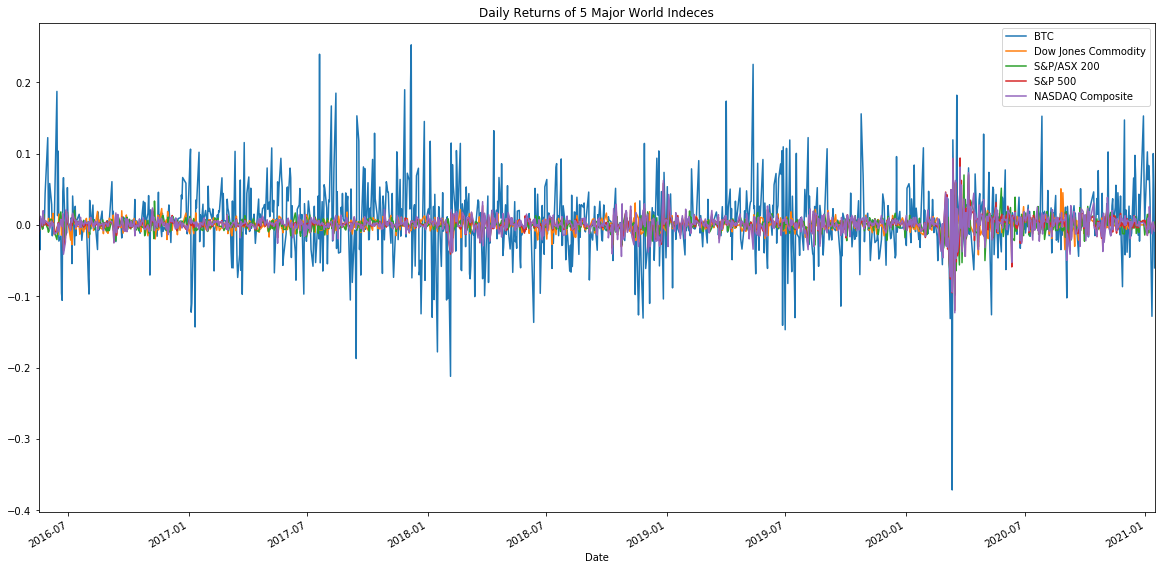

In [6]:
# plot daily returns
indexes_daily_return.plot(figsize=(20,10), title='Daily Returns of 5 Major World Indeces')

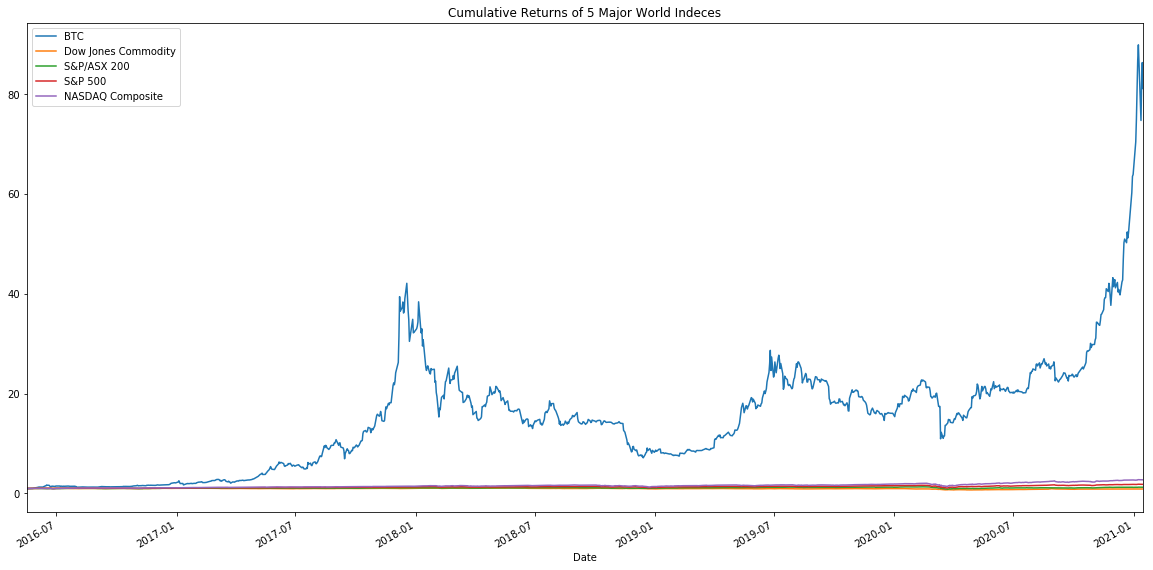

In [7]:
# Calculate and plot cumulative returns for all Indeces.

# Calculate cumulative returns of all Indeces
cumulative_returns = (1 + indexes_daily_return).cumprod()
cumulative_returns

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title='Cumulative Returns of 5 Major World Indeces')

### Risk Analysis:

In [8]:
# Calculate the standard deviation for each portfolio.
# Determine which portfolios are riskier 
daily_std_all_indeces = indexes_daily_return.std().sort_values(ascending = False)
daily_std_all_indeces

BTC                    0.048393
NASDAQ Composite       0.013677
S&P 500                0.012281
S&P/ASX 200            0.010741
Dow Jones Commodity    0.008794
dtype: float64

In [9]:
# Calculate the Annualized Standard Deviation
annualized_std = daily_std_all_indeces * np.sqrt(252)
annualized_std

BTC                    0.768216
NASDAQ Composite       0.217118
S&P 500                0.194957
S&P/ASX 200            0.170515
Dow Jones Commodity    0.139601
dtype: float64

### Sharpe Ratios:

In [10]:
# Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
# Annualized Sharpe Ratios:
sharpe_ratios = (indexes_daily_return.mean() * 252) / (indexes_daily_return.std() * np.sqrt(252))
sharpe_ratios.sort_values()

Dow Jones Commodity   -0.103298
S&P/ASX 200            0.375679
S&P 500                0.772853
NASDAQ Composite       1.119436
BTC                    1.641712
dtype: float64

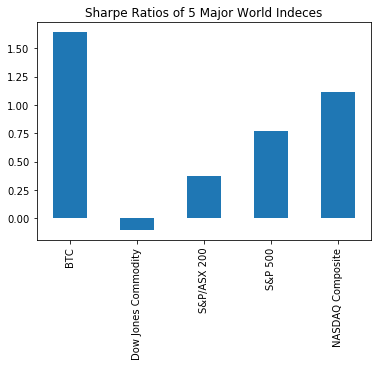

In [11]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title='Sharpe Ratios of 5 Major World Indeces')

In [12]:
# Determine which Indexes outperform best.
print(f"According to the Risk Analysis, the riskier indeces are Dow Jones Commodity with 0.008794 std and S&P/ASX 200 with 0.010741." 
      f"The indeces that outperform best are CryptoCap with 0.048393 std and NASDAQ Composite with 0.013677f." 
      f"S&P 500's std was 0.012281, which is still a good performance.")

According to the Risk Analysis, the riskier indeces are Dow Jones Commodity with 0.008794 std and S&P/ASX 200 with 0.010741.The indeces that outperform best are CryptoCap with 0.048393 std and NASDAQ Composite with 0.013677f.S&P 500's std was 0.012281, which is still a good performance.


## Part 2 - Retirement Plan Tool:

#### According to the best two Indexes front part 1, select them to project their performance in 10-, 20- & 30-years using Monte Carlo simulations.

In [13]:
# Get all data history of 5 years using yf funtion and "Close Price":

portfolio_df = yf.download("BTC-USD ^IXIC", start="2016-05-15", end="2021-05-23").dropna()
portfolio_df = portfolio_df.swaplevel(axis=1)
portfolio_df = portfolio_df.rename(columns=str.lower)
portfolio_df.head()

[*********************100%***********************]  2 of 2 completed


,btc-usd,^ixic,btc-usd,^ixic,btc-usd,^ixic,btc-usd,^ixic,btc-usd,^ixic,btc-usd,^ixic
,adj close,adj close,close,close,high,high,low,low,open,open,volume,volume
Date,,,,,,,,,,,,
2016-05-16,454.162994,4775.459961,454.162994,4775.459961,458.200012,4791.250000,452.945007,4724.729980,457.585999,4728.859863,59171500.0,1.741510e+09
2016-05-17,453.782990,4715.729980,453.782990,4715.729980,455.071991,4776.149902,453.605011,4703.390137,454.009003,4768.850098,64100300.0,1.925230e+09
2016-05-18,454.618988,4739.120117,454.618988,4739.120117,455.997986,4762.279785,453.299011,4704.490234,453.691010,4705.779785,86850096.0,1.934100e+09
2016-05-19,438.714996,4712.529785,438.714996,4712.529785,454.632996,4735.270020,438.714996,4678.379883,454.523987,4717.359863,96027400.0,1.805890e+09
2016-05-20,442.675995,4769.560059,442.675995,4769.560059,444.053986,4781.700195,437.389008,4729.000000,437.792999,4729.439941,81987904.0,1.970520e+09


In [14]:
# Configuring a Monte Carlo simulation to forecast 10-, 20- & 30-years cumulative returns
MC_10years_cm = MCSimulation(
    portfolio_data = portfolio_df,
    weights = [.60,.40],
    num_simulation = 50,
    num_trading_days = 252*10)

MC_20years_cm = MCSimulation(
    portfolio_data = portfolio_df,
    weights = [.60,.40],
    num_simulation = 50,
    num_trading_days = 252*20)

MC_30years_cm = MCSimulation(
    portfolio_data = portfolio_df,
    weights = [.60,.40],
    num_simulation = 50,
    num_trading_days = 252*30)

MC_10years_cm.portfolio_data.head()
MC_20years_cm.portfolio_data.head()
MC_30years_cm.portfolio_data.head()

btc-usd                                                  \
             adj close       close        high         low        open   
Date                                                                     
2016-05-16  454.162994  454.162994  458.200012  452.945007  457.585999   
2016-05-17  453.782990  453.782990  455.071991  453.605011  454.009003   
2016-05-18  454.618988  454.618988  455.997986  453.299011  453.691010   
2016-05-19  438.714996  438.714996  454.632996  438.714996  454.523987   
2016-05-20  442.675995  442.675995  444.053986  437.389008  437.792999   

                                           ^ixic                            \
                volume daily_return    adj close        close         high   
Date                                                                         
2016-05-16  59171500.0          NaN  4775.459961  4775.459961  4791.250000   
2016-05-17  64100300.0    -0.000837  4715.729980  4715.729980  4776.149902   
2016-05-18  86850096.0     0.001842  4739.120117  4739.120117  4762.279785   
2016-05-19  96027400.0    -0.034983  4712.529785  4712.529785  4735.270020   
2016-05-20  81987904.0     0.009029  4769.560059  4769.560059  4781.700195   

                                                                 
                    low         open        volume daily_return  
Date                                                             
2016-05-16  4724.729980  4728.859863  1.741510e+09          NaN  
2016-05-17  4703.390137  4768.850098  1.925230e+09    -0.012508  
2016-05-18  4704.490234  4705.779785  1.934100e+09     0.004960  
2016-05-19  4678.379883  4717.359863  1.805890e+09    -0.005611  
2016-05-20  4729.000000  4729.439941  1.970520e+09     0.012102

In [15]:
# Running a Monte Carlo simulation to forecast 10-, 20- & 30-years cumulative returns

MC_10years_cm.calc_cumulative_return()

MC_20years_cm.calc_cumulative_return()

MC_30years_cm.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,1.001166e+00,1.032171e+00,9.760279e-01,1.015632e+00,1.063858e+00,1.022772e+00,9.507409e-01,1.014245e+00,9.634981e-01,9.639950e-01,...,1.013674e+00,1.000996e+00,9.923254e-01,9.766949e-01,1.031555e+00,9.989929e-01,9.924439e-01,9.933082e-01,1.029278e+00,9.759703e-01
2,9.871539e-01,1.033398e+00,1.007953e+00,1.038166e+00,1.115790e+00,1.070505e+00,9.320143e-01,9.939344e-01,1.029935e+00,9.833137e-01,...,1.061694e+00,1.027987e+00,1.039762e+00,9.910368e-01,1.012775e+00,1.007002e+00,1.010774e+00,1.015448e+00,1.050195e+00,9.668124e-01
3,9.712571e-01,1.034723e+00,1.042607e+00,1.055192e+00,1.099211e+00,1.041127e+00,9.772979e-01,1.011407e+00,9.837845e-01,9.884795e-01,...,9.912190e-01,1.106343e+00,1.081608e+00,1.022086e+00,1.024688e+00,1.004778e+00,1.056235e+00,1.036016e+00,1.044362e+00,9.280073e-01
4,9.770177e-01,1.051620e+00,1.032679e+00,1.054790e+00,1.103851e+00,1.062290e+00,9.647042e-01,1.030402e+00,1.022078e+00,1.050663e+00,...,9.865767e-01,1.122839e+00,1.107052e+00,9.924015e-01,1.088256e+00,9.775982e-01,1.014531e+00,1.084466e+00,1.055473e+00,9.575526e-01
5,9.360047e-01,1.049523e+00,1.050940e+00,1.089581e+00,1.127247e+00,1.074688e+00,1.001422e+00,1.080059e+00,1.031578e+00,1.036737e+00,...,9.387837e-01,1.134066e+00,1.144657e+00,1.001622e+00,1.117266e+00,9.468980e-01,1.025097e+00,1.046139e+00,1.109897e+00,9.905770e-01
6,9.427369e-01,1.095453e+00,1.033001e+00,1.086563e+00,1.121653e+00,1.097036e+00,1.007751e+00,1.103934e+00,1.048814e+00,9.895780e-01,...,9.449127e-01,1.092085e+00,1.188014e+00,1.007020e+00,1.140749e+00,8.949696e-01,1.019700e+00,1.022920e+00,1.084998e+00,1.018633e+00
7,9.184907e-01,1.161143e+00,1.046090e+00,1.052273e+00,1.110119e+00,1.077224e+00,1.027397e+00,1.091868e+00,1.009772e+00,9.929684e-01,...,9.620583e-01,1.104579e+00,1.243232e+00,9.612660e-01,1.152934e+00,9.382429e-01,1.026655e+00,9.722315e-01,1.119152e+00,1.008329e+00
8,9.657363e-01,1.190064e+00,1.106482e+00,1.059356e+00,1.126269e+00,1.068892e+00,1.028959e+00,1.155405e+00,9.557609e-01,9.790250e-01,...,1.050373e+00,1.108915e+00,1.269449e+00,9.545383e-01,1.163631e+00,1.001500e+00,9.695926e-01,1.025187e+00,1.107970e+00,1.013944e+00
9,9.918241e-01,1.173856e+00,1.117606e+00,1.060816e+00,1.155606e+00,1.121830e+00,1.003978e+00,1.136829e+00,1.009740e+00,9.556159e-01,...,1.044811e+00,1.098733e+00,1.285099e+00,9.621537e-01,1.174866e+00,9.184006e-01,9.749747e-01,1.045104e+00,1.129307e+00,9.740944e-01


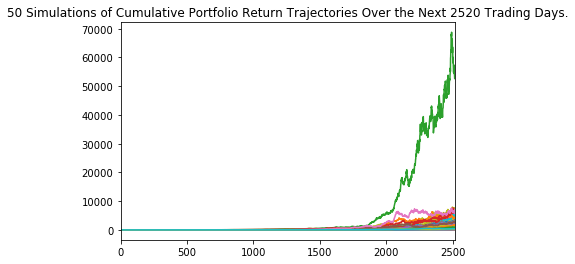

In [16]:
# Plot simulation outcomes 10 Years

MC_sim_10years = MC_10years_cm.plot_simulation()
MC_sim_10years

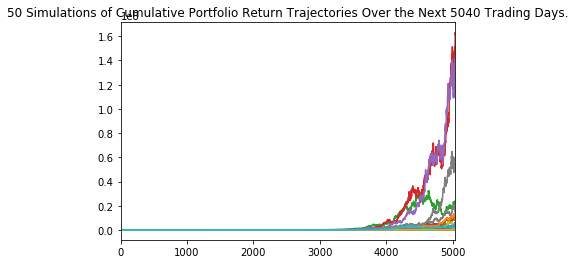

In [17]:
# Plot simulation outcomes 20 Years
MC_sim_20years = MC_20years_cm.plot_simulation()
MC_sim_20years

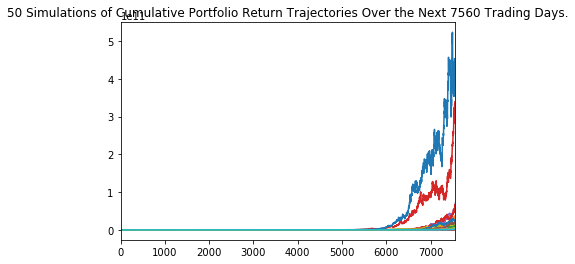

In [18]:
# Plot simulation outcomes 30 Years
MC_sim_30years = MC_30years_cm.plot_simulation()
MC_sim_30years

### Retirement Analysis

In [19]:
# Fetch summary statistics from the Monte Carlo simulation results of 10 Years
MC_sum_sta10 = MC_10years_cm.summarize_cumulative_return()
print(MC_sum_sta10)

count              50.000000
mean             3054.520931
std              7820.935165
min                29.180283
25%               361.337093
50%              1072.214880
75%              3069.892455
max             55068.078887
95% CI Lower       94.851663
95% CI Upper     7541.596749
Name: 2520, dtype: float64


In [20]:
# Fetch summary statistics from the Monte Carlo simulation results of 20 Years
MC_sum_sta20 = MC_20years_cm.summarize_cumulative_return()
print(MC_sum_sta20)

count           5.000000e+01
mean            9.652041e+06
std             2.959997e+07
min             1.689856e+04
25%             2.082207e+05
50%             9.747744e+05
75%             3.796506e+06
max             1.613504e+08
95% CI Lower    2.585683e+04
95% CI Upper    1.134625e+08
Name: 5040, dtype: float64


In [21]:
# Fetch summary statistics from the Monte Carlo simulation results of 30 Years
MC_sum_sta30 = MC_30years_cm.summarize_cumulative_return()
print(MC_sum_sta30)

count           5.000000e+01
mean            2.167910e+10
std             7.526266e+10
min             7.178333e+06
25%             5.350144e+08
50%             2.278462e+09
75%             5.265578e+09
max             4.333444e+11
95% CI Lower    1.644040e+07
95% CI Upper    2.625583e+11
Name: 7560, dtype: float64


#### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on an initial investment of 20,000 and every year of 10,000 or 20,000 during each period.

##### •	Fill up -> Initial investment 20,000.
##### •	Fill up or Select yearly Investment 10,000 or 15,000 or 20,000.
##### •	Print and Plot results of 10-, 20- & 30-years cumulative returns based on above selections.

In [22]:
# Compute summary statistics from the simulated daily returns 10 Years
simulated_returns_MC_10years = {
    "mean": list(MC_10years_cm.simulated_return.mean(axis=1)),
    "median": list(MC_10years_cm.simulated_return.median(axis=1)),
    "min": list(MC_10years_cm.simulated_return.min(axis=1)),
    "max": list(MC_10years_cm.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns_MC_10years = pd.DataFrame(simulated_returns_MC_10years)

# Display sample data
df_simulated_returns_MC_10years.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.004801,1.005620,0.958764,1.055435
2,1.007421,1.008588,0.918405,1.101006
3,1.006191,1.007057,0.900522,1.090870
4,1.005349,0.997705,0.887795,1.149413


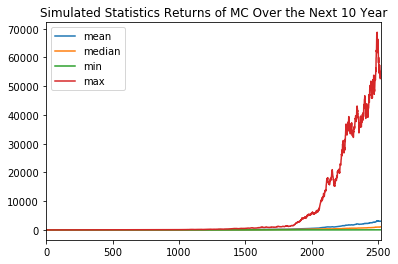

In [23]:
# Use the 'plot' function to create a chart
df_simulated_returns_MC_10years.plot(title="Simulated Statistics Returns of MC Over the Next 10 Year")

In [45]:
# Compute summary statistics from the simulated daily returns 20 Years
simulated_returns_MC_20years = {
    "mean": list(MC_20years_cm.simulated_return.mean(axis=1)),
    "median": list(MC_20years_cm.simulated_return.median(axis=1)),
    "min": list(MC_20years_cm.simulated_return.min(axis=1)),
    "max": list(MC_20years_cm.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns_MC_20years = pd.DataFrame(simulated_returns_MC_20years)

# Display sample data
df_simulated_returns_MC_20years.tail()

,mean,median,min,max
5036,9.412309e+06,9.839448e+05,17941.571054,1.530607e+08
5037,9.570091e+06,1.006167e+06,17945.251852,1.542252e+08
5038,9.816890e+06,1.014540e+06,17528.446896,1.589766e+08
5039,9.804518e+06,9.855874e+05,17320.623528,1.633253e+08
5040,9.652041e+06,9.747744e+05,16898.557554,1.613504e+08


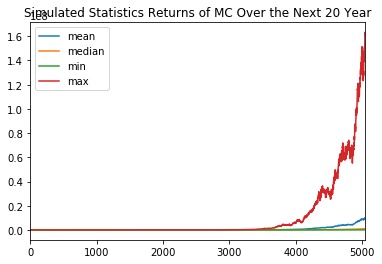

In [25]:
# Use the 'plot' function to create a chart
df_simulated_returns_MC_20years.plot(title="Simulated Statistics Returns of MC Over the Next 20 Year")

In [26]:
# Compute summary statistics from the simulated daily returns 30 Years
simulated_returns_MC_30years = {
    "mean": list(MC_30years_cm.simulated_return.mean(axis=1)),
    "median": list(MC_30years_cm.simulated_return.median(axis=1)),
    "min": list(MC_30years_cm.simulated_return.min(axis=1)),
    "max": list(MC_30years_cm.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns_MC_30years = pd.DataFrame(simulated_returns_MC_30years)

# Display sample data
df_simulated_returns_MC_30years.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.004530,1.001038,0.940043,1.078813
2,1.014342,1.010628,0.898890,1.115790
3,1.020791,1.021774,0.921168,1.106343
4,1.029897,1.023290,0.921823,1.153703


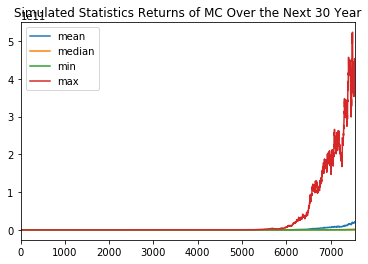

In [27]:
# Use the 'plot' function to create a chart
df_simulated_returns_MC_30years.plot(title="Simulated Statistics Returns of MC Over the Next 30 Year")

In [28]:
from ipywidgets import widgets, interact
from IPython.display import display

# Create text widget for output
initial_investment = widgets.IntText()

# Define function to bind value of the input to the output variable 
def f(x):
    initial_investment.value = str(x)
    
# Create input slider with default value = 10    
interact(f, x=(10000,50000,10000))

initial_investment

interactive(children=(IntSlider(value=30000, description='x', max=50000, min=10000, step=10000), Output()), _d…

IntText(value=30000)

In [35]:
initial_investment.value

20000

In [30]:
from ipywidgets import widgets, interact
from IPython.display import display

# Create text widget for output
annual_investment = widgets.IntText()

# Define function to bind value of the input to the output variable 
def f(x):
    annual_investment.value = str(x)
    
# Create input slider with default value = 10    
interact(f, x=(5000,50000,5000))

annual_investment

interactive(children=(IntSlider(value=25000, description='x', max=50000, min=5000, step=5000), Output()), _dom…

IntText(value=25000)

In [31]:
annual_investment.value

25000

In [32]:
from ipywidgets import widgets, interact
from IPython.display import display

# Create text widget for output
years_projection = widgets.Text()

# Define function to bind value of the input to the output variable 
def f(x):
    years_projection.value = str(x)
list_of_years = ['10','20','30']

# Create input slider with default value = 10    
interact(f, x=list_of_years)
years_projection

interactive(children=(Dropdown(description='x', options=('10', '20', '30'), value='10'), Output()), _dom_class…

Text(value='10')

In [33]:
years_projection.value

'10'

In [43]:
# Calculate the final result based on above criterias
def calculating_final_value_based_on_annual_payments(years_projection,initial_investment,annual_investment):
    years_projection = int(years_projection)
    initial_investment = float(initial_investment)
    annual_investment = float(annual_investment)
    # This is capturing final value of initial investment
    if years_projection == 10:
        simulated_returns_df = df_simulated_returns_MC_10years
    elif years_projection == 20:
        simulated_returns_df = df_simulated_returns_MC_20years
    elif years_projection == 30:
        simulated_returns_df = df_simulated_returns_MC_30years
    total = initial_investment * simulated_returns_df['mean'].iloc[-1]
    for n in range(0,len(simulated_returns_df),252):
    # This is capturing final value of annual investment each year
        total += annual_investment * simulated_returns_df['mean'].iloc[-1]/simulated_returns_df.loc[n,'mean']
    # This reflects the total!
    return total

In [44]:

calculating_final_value_based_on_annual_payments(years_projection.value,initial_investment.value,annual_investment.value)

640267179226.5776

In [ ]:
# Plot Results :)
calculating_final_value_based_on_annual_payments.plot(title="Returns of the Retirement Plan {} Over the Next Year {years_projection} years")

## 